In [20]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def rgb_to_hsv(rgb):
  ## Input: rgb is an 3-D array with values in range [0,255].
  # r = rgb[0][0][0], b = rgb[0][0][1], g = rgb[0][0][2]
  # Output: hsv is an 1-D array [h,s,v] with values in range h = [0,180], s = [0,255], v = [0,255].
  # Normalize color values. Convert to floating point values between 0 - 1
    rgb=np.array(rgb)/255
    
    # Initialize HSV
    h = 0.0
    s = 0.0
    v = 0.0
    # to find the max and min RGB values and set the V 
    v = np.max(rgb)
    vMin = np.min(rgb)
    # Set the saturation value.
    if(v>0.0):
      s = (v - vMin)/v
    else:
      s = 0.0
    # Calculate (v - vMin) convenience
    diff = (v - vMin)
    # Compute the hue by the relative sizes of the RGB components

    # Are r,g,b equal.
    if(rgb[0][0][0] == rgb[0][0][1] and rgb[0][0][1] == rgb[0][0][2]):
      h = 0
    # Is the point within +/- 60 degrees of the red axis
    elif(rgb[0][0][0] == v):
      h = 60 * (rgb[0][0][1] - rgb[0][0][2]) / diff
    # Is the point within +/- 60 degrees of the green axis
    elif(rgb[0][0][1] == v):
      h = 120 + 60 * (rgb[0][0][2] - rgb[0][0][0]) / diff
    # IS the point within +/- 60 degrees of the blue axis
    elif(rgb[0][0][2] == v):
      h = 240 + 60 * (rgb[0][0][0] - rgb[0][0][1]) / diff

    h=round(h/2)
    #Normalize color values. Convert to floating point values between 0 - 255
    s = round(np.interp(s,[0,1],[0,255]))
    v = round(np.interp(v,[0,1],[0,255]))
    return np.array([[[h,s,v]]])

In [22]:
def rgb_to_hsv_func(img):
    #Saving height and width
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    #Creating an empty array as image shape
    imgHSV = np.zeros((h,w,d), dtype=np.uint8)

    #For each row in our grid.
    for y in range(0,h):
        #Search each pixel in the row
        for x in range(0,w):
            rgb=[[img[y][x]]]
            imgHSV[y][x]=rgb_to_hsv(rgb)
    return imgHSV

In [23]:
def bgr_to_rgb_func(img):
    #Saving height and width
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]
    
    #Creating an empty array as image shape
    imgRGB = np.zeros((h,w,d), dtype=np.uint8)
    #For each row in our grid.
    for y in range(0,h):
        #Search each pixel in the row
        for x in range(0,w):
            imgRGB[y][x][0]=img[y][x][2]
            imgRGB[y][x][1]=img[y][x][1]
            imgRGB[y][x][2]=img[y][x][0]
    return imgRGB

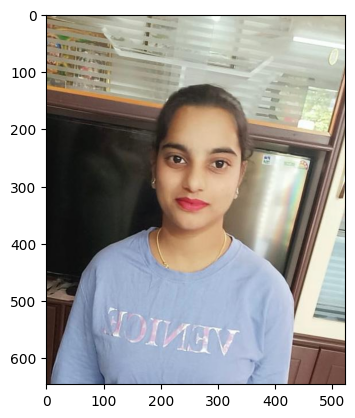

In [24]:
# Import image
img = cv2.imread('siri.jpg', 1)
img = bgr_to_rgb_func(img)
plt.imshow(img)

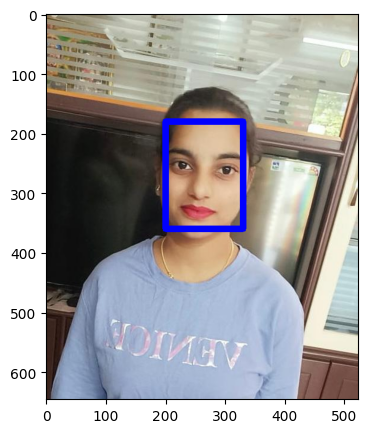

In [25]:
# Convert back to BGR
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Top left of rectangle.
top_left = (200, 180)

# Bottom right of rectangle.
bottom_right = (330, 360)

# Color
rect_color = (255,0,0)

# Thickness of line
thickness = 10

# Apply rectangle.
img_rect = cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)

# Convert back to RGB
img_rect = bgr_to_rgb_func(img_rect)

# Make image larger on plot.
fig = plt.figure(figsize=(5,5))

# Plot image.
plt.imshow(img_rect)


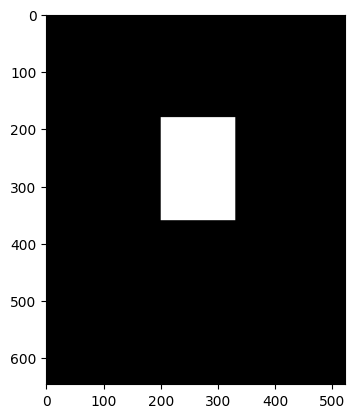

In [26]:
# Create an black mask.
mask = np.zeros(img.shape[:2], np.uint8)

# Add the white portion of the mask.
mask[180:360, 200:330] = 255

# Plot mask.
plt.imshow(mask, cmap="gray")

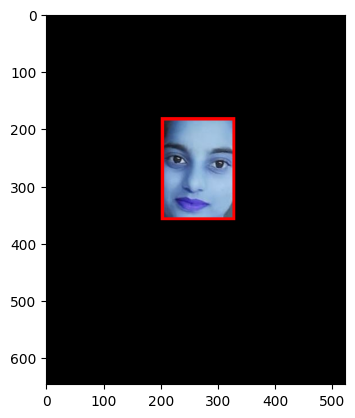

In [27]:
img_masked = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(img_masked)

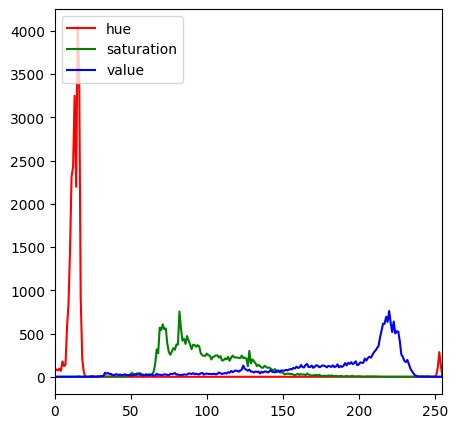

In [28]:
# Reimport image
img = cv2.imread("siri.jpg", 1)
img = bgr_to_rgb_func(img)
img = rgb_to_hsv_func(img)
# Size of the histogram
fig = plt.figure(figsize=(5,5))

# Plot the hue.
hist = cv2.calcHist([img],[0],mask,[256],[0,255])
plt.plot(hist, color="red")
plt.xlim([0,255])

# Plot the saturation
hist = cv2.calcHist([img],[1],mask,[256],[0,255])
plt.plot(hist, color="green")
plt.xlim([0,255])

# Plot the value
hist = cv2.calcHist([img],[2],mask,[256],[0,255])
plt.plot(hist, color="blue")
plt.xlim([0,255])

plt.legend(('hue', 'saturation', 'value'), loc = 'upper left')
plt.show()

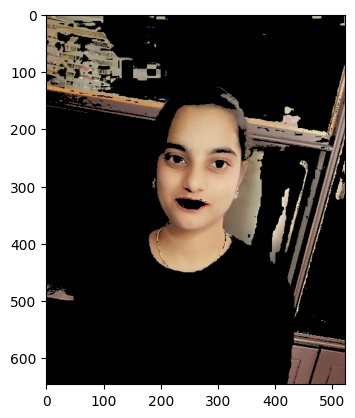

In [29]:
# Minimum and maximum HSV values.
min_HSV = np.array([0,30,100], np.uint8)
max_HSV = np.array([25,170,240], np.uint8)

# cv2.inRange(image, minimum, maximum)
skinArea = cv2.inRange(img, min_HSV, max_HSV)

# Bitwise And mask
skinHSV = cv2.bitwise_and(img, img, mask=skinArea)

# Convert to RGB
skinHSV = cv2.cvtColor(skinHSV, cv2.COLOR_HSV2RGB)

# Plot masked image.
plt.imshow(skinHSV)